In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os 
from sklearn.linear_model import LinearRegression

In [ ]:
netflix_data = pd.read_csv("/content/drive/MyDrive/Datasets-Streaming/netflix_titles.csv")

FileNotFoundError: ignored

In [ ]:
amazon_data = pd.read_csv("/content/drive/MyDrive/Datasets-Streaming/amazon_prime_titles.csv")

In [ ]:
disney_data = pd.read_csv("/content/drive/MyDrive/Datasets-Streaming/disney_plus_titles.csv")

In [ ]:
hulu_data = pd.read_csv("/content/drive/MyDrive/Datasets-Streaming/hulu_titles.csv")

In [ ]:
netflix_data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,count,first_country,target_ages
0,s1,Movie,dick johnson is dead,Kirsten Johnson,No data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021,1,USA,Teens
1,s2,TV Show,blood & water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021,1,South Africa,Adults
2,s3,TV Show,ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021,1,USA,Adults
3,s4,TV Show,jailbirds new orleans,No Data,No data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021,1,USA,Adults
4,s5,TV Show,kota factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021,1,India,Adults


In [ ]:
hulu_data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Ricky Velez: Here's Everything,NaN,NaN,NaN,"October 24, 2021",2021,TV-MA,NaN,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...
1,s2,Movie,Silent Night,NaN,NaN,NaN,"October 23, 2021",2020,NaN,94 min,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r..."
2,s3,Movie,The Marksman,NaN,NaN,NaN,"October 23, 2021",2021,PG-13,108 min,"Action, Thriller",A hardened Arizona rancher tries to protect an...
3,s4,Movie,Gaia,NaN,NaN,NaN,"October 22, 2021",2021,R,97 min,Horror,A forest ranger and two survivalists with a cu...
4,s5,Movie,Settlers,NaN,NaN,NaN,"October 22, 2021",2021,NaN,104 min,"Science Fiction, Thriller",Mankind's earliest settlers on the Martian fro...


Null Rate in coloumns 

In [ ]:
for col in netflix_data.columns:
    null_rate = netflix_data[col].isna().sum()/np.shape(netflix_data)[0] *100
    if null_rate >0:
      print("{} null rate : {}%".format(col,round(null_rate,2)))

In [ ]:
for col in amazon_data.columns:
    null_rate = amazon_data[col].isna().sum() / np.shape(amazon_data)[0] * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(col,round(null_rate,2)))

In [ ]:
for i in disney_data.columns:
    null_rate = disney_data[i].isna().sum() / len(disney_data) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

In [ ]:
for i in hulu_data.columns:
    null_rate = hulu_data[i].isna().sum() / len(hulu_data) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 99.9%
cast null rate: 100.0%
country null rate: 47.28%
date_added null rate: 0.91%
rating null rate: 16.92%
duration null rate: 15.59%
description null rate: 0.13%


Dealing with missing Data

In [ ]:
netflix_data['country'] = netflix_data['country'].fillna(netflix_data['country'].mode()[0])
netflix_data['cast'] = netflix_data['cast'].fillna("No data")
netflix_data['director'] = netflix_data['director'].fillna("No Data")


In [ ]:
netflix_data.dropna(inplace=True)

In [ ]:
netflix_data.drop_duplicates( inplace=True)

In [ ]:
netflix_data.isnull().sum()

show_id             0
type                0
title               0
director            0
cast                0
country             0
date_added          0
release_year        0
rating              0
duration            0
listed_in           0
description         0
month_added         0
month_name_added    0
year_added          0
count               0
first_country       0
target_ages         0
dtype: int64

In [ ]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8790 non-null   object        
 1   type              8790 non-null   object        
 2   title             8790 non-null   object        
 3   director          8790 non-null   object        
 4   cast              8790 non-null   object        
 5   country           8790 non-null   object        
 6   date_added        8790 non-null   datetime64[ns]
 7   release_year      8790 non-null   int64         
 8   rating            8790 non-null   object        
 9   duration          8790 non-null   object        
 10  listed_in         8790 non-null   object        
 11  description       8790 non-null   object        
 12  month_added       8790 non-null   int64         
 13  month_name_added  8790 non-null   object        
 14  year_added        8790 n

In [ ]:
amazon_data['country'] = amazon_data['country'].fillna(amazon_data['country'].mode()[0])
amazon_data['cast'] = amazon_data['cast'].fillna("No data")
amazon_data['director'] = amazon_data['director'].fillna("No Data")
amazon_data['date_added'] = amazon_data['date_added'].fillna("No Data")
amazon_data["rating"] = amazon_data["rating"].fillna("No Data")
amazon_data.dropna(how = "all",inplace=True)
amazon_data.drop_duplicates( inplace=True)
amazon_data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      9668 non-null   object
 4   cast          9668 non-null   object
 5   country       9668 non-null   object
 6   date_added    9668 non-null   object
 7   release_year  9668 non-null   int64 
 8   rating        9668 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 981.9+ KB


In [ ]:
disney_data['country'] = disney_data['country'].fillna(disney_data['country'].mode()[0])
disney_data['cast'] = disney_data['cast'].fillna("No Data")
disney_data['director'] = disney_data['director'].fillna("No Data")
disney_data['date_added'] = disney_data['date_added'].fillna(" No Data")
disney_data['rating'] = disney_data['rating'].fillna("No Data")
disney_data.dropna(how = "all",inplace=True)
disney_data.drop_duplicates( inplace=True)
disney_data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
disney_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      1450 non-null   object
 4   cast          1450 non-null   object
 5   country       1450 non-null   object
 6   date_added    1450 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1450 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 147.3+ KB


In [ ]:
hulu_data['country'] = hulu_data['country'].fillna(hulu_data['country'].mode()[0])
hulu_data['cast'] = hulu_data['cast'].fillna("No Data")
hulu_data['director'] = hulu_data['director'].fillna("No Data")
hulu_data['date_added'] = hulu_data['date_added'].fillna(" No Data")
hulu_data['rating'] = hulu_data['rating'].fillna("No Data")
hulu_data['duration'] = hulu_data['duration'].fillna("No Data")
hulu_data['description'] = hulu_data['description'].fillna("No Data") 
hulu_data.dropna(how = "all",inplace=True)
hulu_data.drop_duplicates( inplace=True)
hulu_data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
hulu_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Ricky Velez: Here's Everything,No Data,No Data,United States,"October 24, 2021",2021,TV-MA,No Data,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...
1,s2,Movie,Silent Night,No Data,No Data,United States,"October 23, 2021",2020,No Data,94 min,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r..."
2,s3,Movie,The Marksman,No Data,No Data,United States,"October 23, 2021",2021,PG-13,108 min,"Action, Thriller",A hardened Arizona rancher tries to protect an...
3,s4,Movie,Gaia,No Data,No Data,United States,"October 22, 2021",2021,R,97 min,Horror,A forest ranger and two survivalists with a cu...
4,s5,Movie,Settlers,No Data,No Data,United States,"October 22, 2021",2021,No Data,104 min,"Science Fiction, Thriller",Mankind's earliest settlers on the Martian fro...
...,...,...,...,...,...,...,...,...,...,...,...,...
3068,s3069,TV Show,Star Trek: The Original Series,No Data,No Data,United States,No Data,1966,TV-PG,3 Seasons,"Action, Adventure, Classics",The 23rd century adventures of Captain James T...
3069,s3070,TV Show,Star Trek: Voyager,No Data,No Data,United States,No Data,1997,TV-PG,7 Seasons,"Action, Adventure, Science Fiction",Catapulted into the distant sector of the gala...
3070,s3071,TV Show,The Fades,No Data,No Data,United Kingdom,No Data,2011,TV-14,1 Season,"Horror, International, Science Fiction",Seventeen-year-old Paul is haunted by apocalyp...
3071,s3072,TV Show,The Twilight Zone,No Data,No Data,United States,No Data,1959,TV-PG,5 Seasons,"Classics, Science Fiction, Thriller",Rod Serling's seminal anthology series focused...


In [ ]:
netflix_data['date_added'][10]

Timestamp('2021-09-24 00:00:00')

In [ ]:
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])
netflix_data['month_added'] = netflix_data['date_added'].dt.month
netflix_data['month_name_added'] = netflix_data['date_added'].dt.month_name()
netflix_data['year_added'] = netflix_data['date_added'].dt.year

visualizing

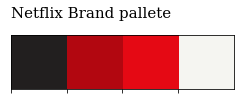

In [ ]:
sns.palplot(['#221f1f','#b20710','#e50914','#f5f5f1'])
plt.title("Netflix Brand pallete", loc = "left",fontfamily="serif",fontsize=15,y=1.2)
plt.show()

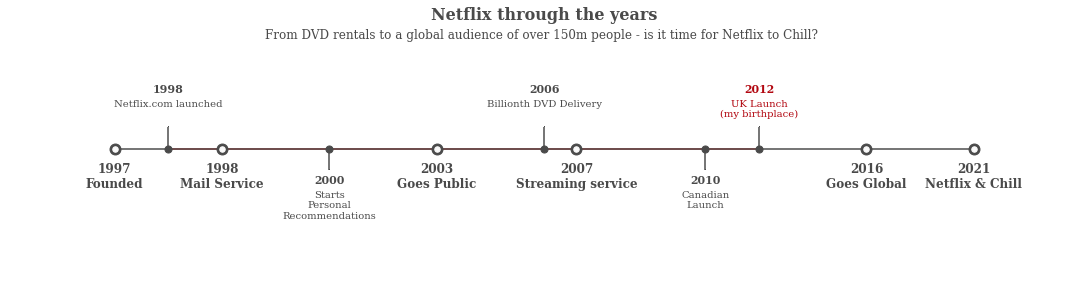

In [ ]:
from datetime import datetime

tl_dates = [
    "1997\nFounded",
    "1998\nMail Service",
    "2003\nGoes Public",
    "2007\nStreaming service",
    "2016\nGoes Global",
    "2021\nNetflix & Chill"
]

tl_x = [1, 2, 4, 5.3, 8,9]

tl_sub_x = [1.5,3,5,6.5,7]


tl_sub_times = [
    "1998","2000","2006","2010","2012"
]

tl_text = [
    "Netflix.com launched",
    "Starts\nPersonal\nRecommendations","Billionth DVD Delivery","Canadian\nLaunch","UK Launch\n(my birthplace)"]



fig, ax = plt.subplots(figsize=(15, 4), constrained_layout=True)
ax.set_ylim(-2, 1.75)
ax.set_xlim(0, 10)


ax.axhline(0, xmin=0.1, xmax=0.9, c='#4a4a4a', zorder=1)


ax.scatter(tl_x, np.zeros(len(tl_x)), s=120, c='#4a4a4a', zorder=2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='#fafafa', zorder=3)
ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s=50, c='#4a4a4a',zorder=4)

for x, date in zip(tl_x, tl_dates):
    ax.text(x, -0.55, date, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a',fontsize=12)
    
levels = np.zeros(len(tl_sub_x))    
levels[::2] = 0.3
levels[1::2] = -0.3
markerline, stemline, baseline = ax.stem(tl_sub_x, levels, use_line_collection=True)    
plt.setp(baseline, zorder=0)
plt.setp(markerline, marker=',', color='#4a4a4a')
plt.setp(stemline, color='#4a4a4a')

for idx, x, time, txt in zip(range(1, len(tl_sub_x)+1), tl_sub_x, tl_sub_times, tl_text):
    ax.text(x, 1.3*(idx%2)-0.5, time, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a' if idx!=len(tl_sub_x) else '#b20710', fontsize=11)
    
    ax.text(x, 1.3*(idx%2)-0.6, txt, va='top', ha='center', 
        fontfamily='serif',color='#4a4a4a' if idx!=len(tl_sub_x) else '#b20710')



for spine in ["left", "top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

ax.set_xticks([]) 
ax.set_yticks([]) 

ax.set_title("Netflix through the years", fontweight="bold", fontfamily='serif', fontsize=16, color='#4a4a4a')
ax.text(2.4,1.57,"From DVD rentals to a global audience of over 150m people - is it time for Netflix to Chill?", fontfamily='serif', fontsize=12, color='#4a4a4a')

plt.show()

Group by Content

In [ ]:
x = netflix_data.groupby(['type'])['type'].count()
y = len(netflix_data)
r =((x/y)).round(2)
mf_ratio = pd.DataFrame(r).T

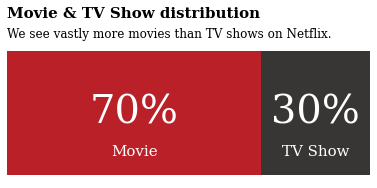

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(6.5, 2.5))
ax.barh(mf_ratio.index, mf_ratio['Movie'], 
        color='#b20710', alpha=0.9, label='Male')
ax.barh(mf_ratio.index, mf_ratio['TV Show'], left=mf_ratio['Movie'], 
        color='#221f1f', alpha=0.9, label='Female')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])


for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Movie'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')

    ax.annotate("Movie", 
                   xy=(mf_ratio['Movie'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')
    
    
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['TV Show'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("TV Show", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')






fig.text(0.125,1.03,'Movie & TV Show distribution', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.92,'We see vastly more movies than TV shows on Netflix.',fontfamily='serif',fontsize=12)  

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
ax.legend().set_visible(False)
plt.show()

In [ ]:
netflix_data['count'] = 1
netflix_data['first_country'] = netflix_data['country'].apply(lambda x:x.split(",")[0])
netflix_data['first_country'].head()

0    United States
1     South Africa
2    United States
3    United States
4            India
Name: first_country, dtype: object

In [ ]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
netflix_data['target_ages'] = netflix_data['rating'].replace(ratings_ages)

In [ ]:
netflix_data['target_ages']

0            Teens
1           Adults
2           Adults
3           Adults
4           Adults
           ...    
8802        Adults
8803    Older Kids
8804        Adults
8805    Older Kids
8806         Teens
Name: target_ages, Length: 8790, dtype: object

In [ ]:
netflix_data['first_country'].replace('United States','USA',inplace = True)
netflix_data['first_country'].replace('United Kingdom','UK',inplace = True)
netflix_data['first_country'].replace('South Korea','S.Korea',inplace = True)

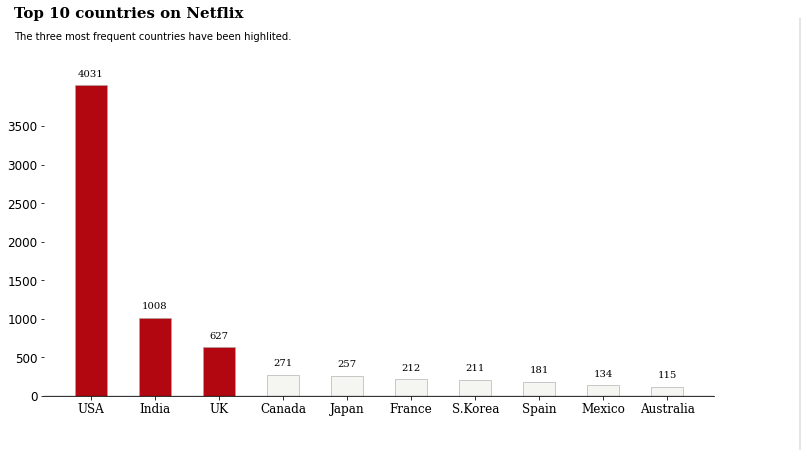

In [ ]:
data = netflix_data.groupby('first_country')['count'].sum().sort_values(ascending=False)[:10]
color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] = "#b20710"
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.bar(data.index,data,width=0.5,edgecolor="darkgray",linewidth=0.6,color=color_map)
for i in data.index:
  ax.annotate(f"{data[i]}",
              xy=(i,data[i]+150),
              va = "center",ha="center",fontweight="light",fontfamily="serif")
  
for s in ['top','left','right']:
  ax.spines[s].set_visible(False)

ax.set_xticklabels(data.index, fontfamily = 'serif', rotation=0)
fig.text(0.09,1,'Top 10 countries on Netflix',fontsize = 15, fontweight = "bold",fontfamily="serif")
fig.text(0.09,0.95,"The three most frequent countries have been highlited.")
grid_y_ticks = np.arange(0,4000,500)
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)
plt.axhline(y=0,color="black",linewidth=1.3,alpha=0.7)
ax.tick_params(axis="both",which="major",labelsize=12)
import matplotlib.lines as lines 
l1 = lines.Line2D([1,1],[0,1],transform=fig.transFigure,figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])
plt.show()

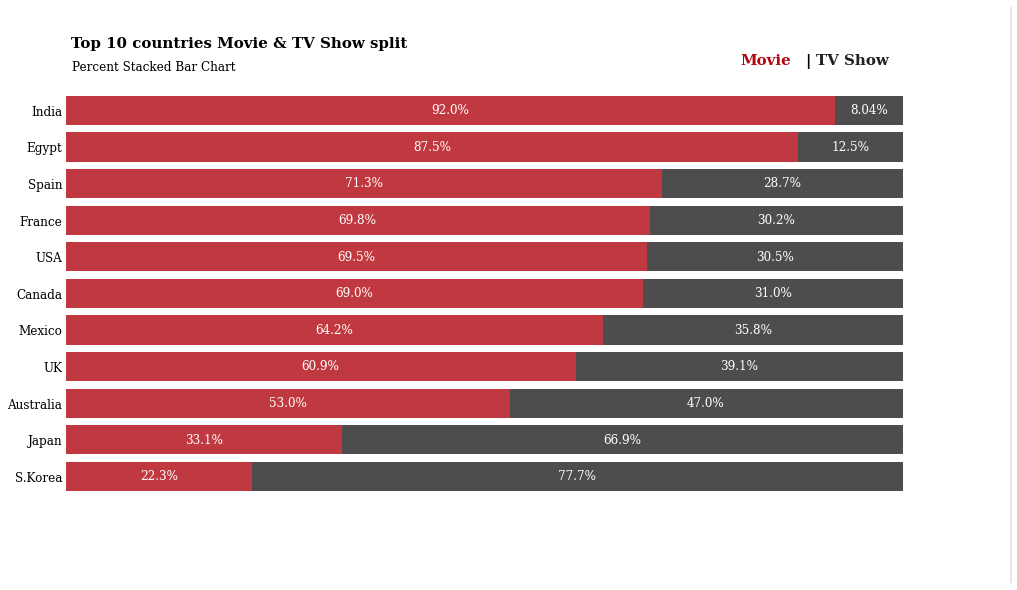

In [ ]:
country_order = netflix_data['first_country'].value_counts()[:11].index
data_q2q3 = netflix_data[['type', 'first_country']].groupby('first_country')['type'].value_counts().unstack().loc[country_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'], 
        color='#b20710', alpha=0.8, label='Movie')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], left=data_q2q3_ratio['Movie'], 
        color='#221f1f', alpha=0.8, label='TV Show')


ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)

# male percentage
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Movie'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['TV Show'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]+data_q2q3_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')
    

fig.text(0.13, 0.93, 'Top 10 countries Movie & TV Show split', fontsize=15, fontweight='bold', fontfamily='serif')   
fig.text(0.131, 0.89, 'Percent Stacked Bar Chart', fontsize=12,fontfamily='serif')   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    

fig.text(0.75,0.9,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.81,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.82,0.9,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')





import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])




ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

In [ ]:
order = pd.DataFrame(netflix_data.groupby('rating')['count'].sum().sort_values(ascending=False).reset_index())
rating_order = list(order['rating'])

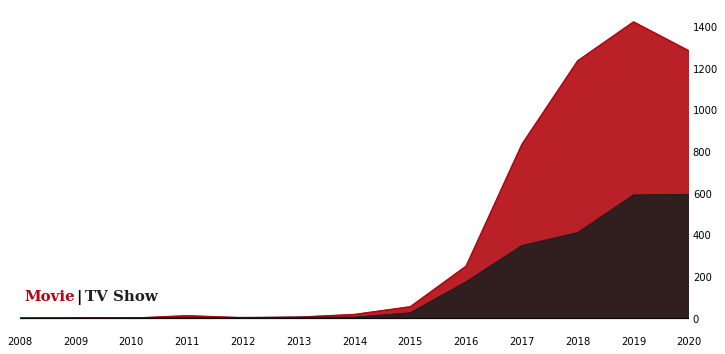

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(netflix_data['type'].value_counts().index):
    mtv_rel = netflix_data[netflix_data['type']==mtv]['year_added'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], alpha=0.9)
    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(2008,2020)
plt.xticks(np.arange(2008, 2021, 1))


fig.text(0.13,0.2,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.2,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

MOVIE GENRES


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.colors
cmap = matplotlib.colors.LinearSegmentedColormap


In [ ]:
# Genres
from sklearn.preprocessing import MultiLabelBinarizer 

import matplotlib.colors
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710','#f5f5f1'])
def genre_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print("There are {} types in the Netflix {} Dataset".format(len(Types),title))    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10, 7))
    fig.text(.54,.88,'Genre correlation', fontfamily='serif',fontweight='bold',fontsize=15)
    fig.text(.75,.665,
            '''
             It is interesting that Independant Movies
             tend to be Dramas. 
             
             Another observation is that 
             Internatinal Movies are rarely
             in the Children's genre.
             ''', fontfamily='serif',fontsize=12,ha='right')
    pl = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)
    plt.show()

In [ ]:
us_ind = netflix_data[(netflix_data['first_country'] == 'USA') | (netflix_data['first_country'] == 'India' )]
data_sub = netflix_data.groupby('first_country')['year_added'].value_counts().unstack().fillna(0).loc[['USA','India']].cumsum(axis=0).T



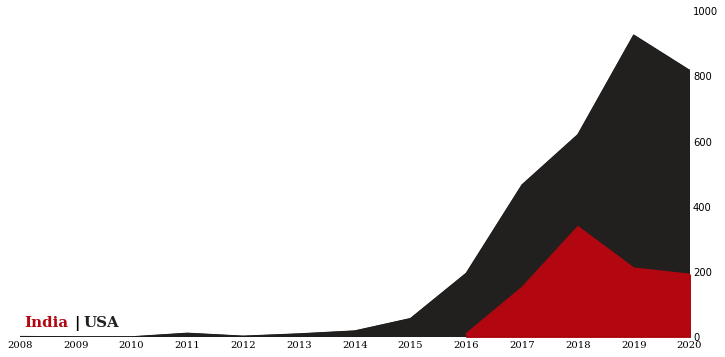

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ['#221f1f', '#b20710','#f5f5f1']

for i, hs in enumerate(us_ind['first_country'].value_counts().index):
    hs_built = us_ind[us_ind['first_country']==hs]['year_added'].value_counts().sort_index()
    ax.plot(hs_built.index, hs_built, color=color[i], label=hs)
    ax.fill_between(hs_built.index, 0, hs_built, color=color[i], label=hs)
    

ax.set_ylim(0, 1000)
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.yaxis.tick_right()
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .4)

for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)
ax.set_xticklabels(data_sub.index, fontfamily='serif', rotation=0)
ax.margins(x=0) # remove white spaces next to margins

ax.set_xlim(2008,2020)
plt.xticks(np.arange(2008, 2021, 1))
fig.text(0.13,0.15,"India", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.188,0.15,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.198,0.15,"USA", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.show()

In [ ]:
data_sub

first_country,USA,India
year_added,,
2008,2.0,2.0
2009,1.0,1.0
2010,1.0,1.0
2011,12.0,12.0
2012,3.0,3.0
2013,10.0,10.0
2014,19.0,19.0
2015,57.0,57.0
2016,196.0,207.0


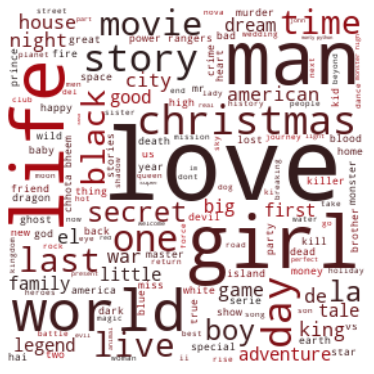

In [ ]:
from wordcloud import WordCloud
import random
from PIL import Image
import matplotlib

# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])

text = str(list(netflix_data['title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

mask = np.array(Image.open('/content/drive/MyDrive/Datasets-Streaming/netflix_data/7-79068_netflix-n-logo-transparent-hd-png-download.png'))

wordcloud = WordCloud(background_color = 'white', width = 500,  height = 200,colormap=cmap, max_words = 150, mask = mask).generate(text)

plt.figure( figsize=(5,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
netflix_data['description'] = netflix_data['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(netflix_data['description'])
tfidfg_matrix = tfidf.fit_transform(netflix_data['listed_in'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape,tfidfg_matrix.shape


((8790, 18878), (8790, 44))

In [ ]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices = pd.Series(netflix_data.index, index=netflix_data['title']).drop_duplicates()



title
dick johnson is dead        0
blood & water               1
ganglands                   2
jailbirds new orleans       3
kota factory                4
                         ... 
zodiac                   8802
zombie dumb              8803
zombieland               8804
zoom                     8805
zubaan                   8806
Length: 8790, dtype: int64

In [ ]:
indices["zombieland"]

8804

array([0.        , 0.        , 0.        , ..., 0.        , 0.01637208,
       0.        ])

In [ ]:
def get_recommendations_desc(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_data['title'].iloc[movie_indices]

In [ ]:
get_recommendations_desc('kota factory',cosine_sim)

[(2272, 0.1299528781598593), (266, 0.1255474400378485), (2091, 0.12364271471216452), (4076, 0.12294050646430864), (805, 0.11913807227436055), (2690, 0.11781817620426634), (1727, 0.11733596954009202), (8215, 0.11609285112242707), (8595, 0.11171408758610198), (2362, 0.11100518774969191)]


2272                     drishyam
266          the creative indians
2091             the bridge curse
4076    she's dating the gangster
805                   racket boys
2690                       code 8
1727               girl's revenge
8232              the bye bye man
8612            train of the dead
2362               the politician
Name: title, dtype: object

In [ ]:
def get_recommendations_genre(title, cosine_sim=cosine_sim_genre):
    idx = indicies_genre[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim_genre[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_data['title'].iloc[movie_indices]

In [ ]:
get_recommendations_genre("kota factory",cosine_sim_genre)

47                the smart money woman
121                      hotel del luna
186                hometown cha-cha-cha
287                      i need romance
316                        office girls
319    the prince who turns into a frog
321                         two fathers
322                   you're my destiny
397                     feels like ishq
456                    her private life
Name: title, dtype: object

In [ ]:
books=pd.read_csv('/content/drive/MyDrive/Datasets-Streaming/netflix_data/books.csv')
books['original_title']=books['original_title'].str.lower()
x=netflix_data
x['title']=x['title'].str.lower()
t=x.merge(books, left_on='title', right_on='original_title', how="inner")

In [ ]:
import plotly.graph_objects as go

labels = ['Shows from books','Shows not from books']
values = [248,6234]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()